**Trabajo Final Fundamentos de aprendizaje de máquina**

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (18, 10)
plt.style.use('seaborn')
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
df['Revenue'] = LabelEncoder().fit_transform(df.Revenue.values)
l={'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Month'}
for s in l:
  df = df.astype({s: object})
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

**Gráfica de Barras - variables cualitativas**

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object') 7


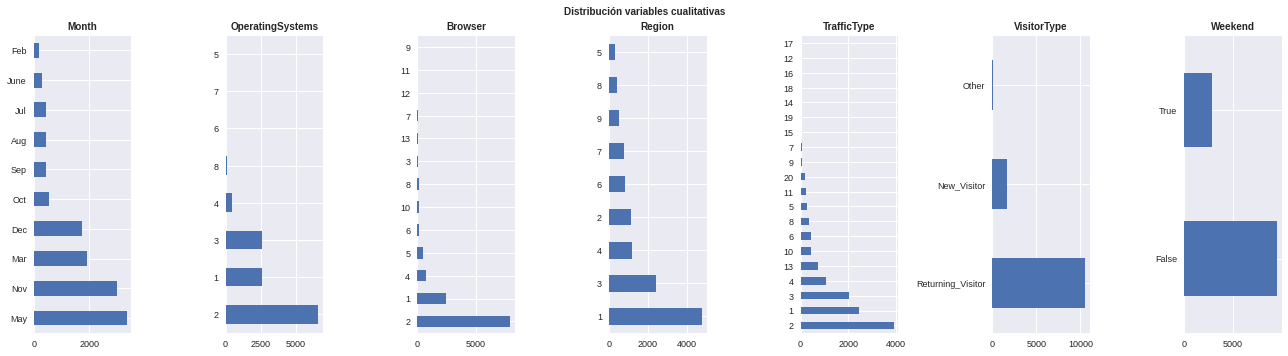

In [6]:
columnas_object = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(columnas_object), figsize=(18, 5))
axes = axes.flat
print(columnas_object, len(columnas_object))
for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas', fontsize = 10, fontweight = "bold");

**Gráfica de cajas - variables numéricas**

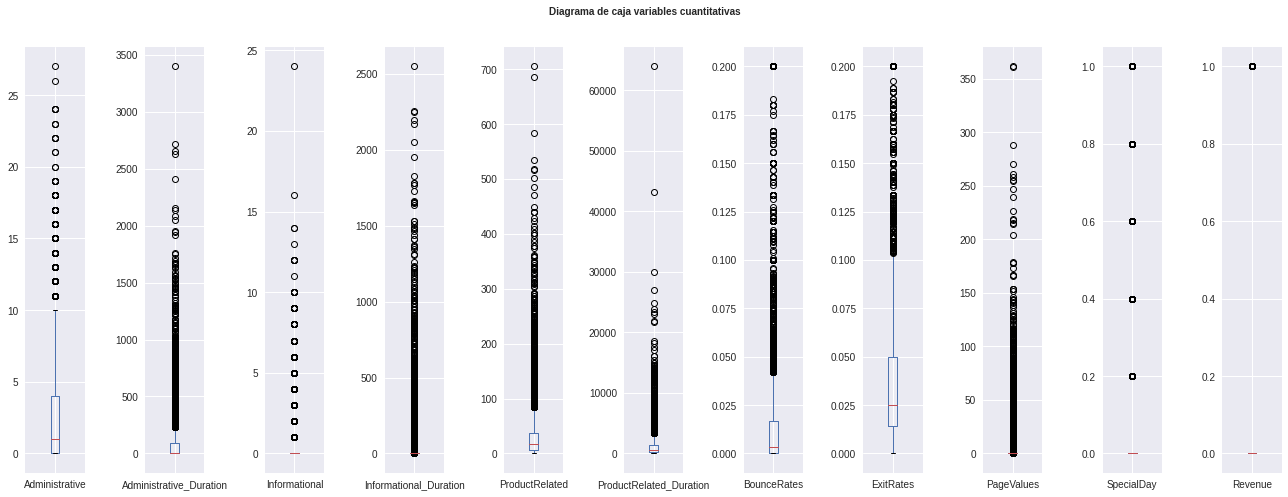

In [7]:
columnas_num = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(columnas_num), figsize=(18, 7))
for i, colum in enumerate(columnas_num):
    df.boxplot(colum, ax=axes.flatten()[i])
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagrama de caja variables cuantitativas', fontsize = 10, fontweight = "bold");

In [8]:
print('Valores únicos')
for i in range(df.shape[1]):
  print(df.columns.values[i])
  print(df.iloc[:,i].unique())

Valores únicos
Administrative
[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration
[  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 1

Text(0.5, 1.0, 'Matriz de Correlación Pearson')

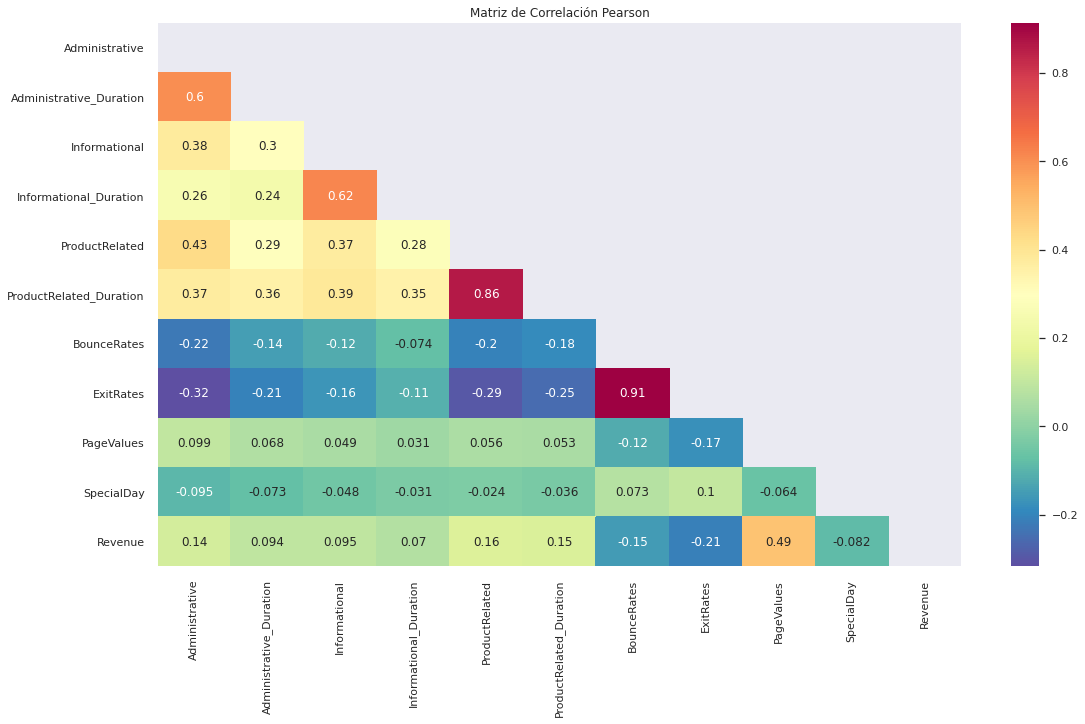

In [9]:
sb.set()
plt.rcParams['figure.figsize'] = (18, 10)
pearsoncorr = df.corr(method='pearson')
pearsoncorr
mask = np.zeros_like(pearsoncorr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(pearsoncorr, annot=True, cmap='Spectral_r', mask=mask)
plt.title('Matriz de Correlación Pearson')

**Tablas de Contingencia**

In [10]:
pd.crosstab(df['Month'], df['Revenue'])

Revenue,0,1
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115


In [11]:
pd.crosstab(df['Browser'], df['Revenue'])

Revenue,0,1
Browser,,
1,2097,365
2,6738,1223
3,100,5
4,606,130
5,381,86
6,154,20
7,43,6
8,114,21
9,1,0


In [12]:
pd.crosstab(df['TrafficType'], df['Revenue'])

Revenue,0,1
TrafficType,,
1,2189,262
2,3066,847
3,1872,180
4,904,165
5,204,56
6,391,53
7,28,12
8,248,95
9,38,4


**Modelando**

In [13]:
df['VisitorType_T'] = df[['VisitorType']].replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})
df['Weekend_T'] = df['Weekend'].astype(int)
df['Month_T'] = df[['Month']].replace({'Month' : {'Feb' : 4, 'Mar' : 2, 'May' : 2, 'June' : 2
    , 'Jul' : 1, 'Aug' : 1, 'Sep' : 3, 'Oct' : 3, 'Nov' : 3, 'Nov' : 3, 'Dec' : 1}})

df['Browser_T'] = df['Browser'].replace(1,1)
df['Browser_T'] = df['Browser'].replace(2,1)
df['Browser_T'] = df['Browser'].replace(6,1)
df['Browser_T'] = df['Browser'].replace(7,1)
df['Browser_T'] = df['Browser'].replace(8,1)

df['Browser_T'] = df['Browser'].replace(4,2)
df['Browser_T'] = df['Browser'].replace(5,2)
df['Browser_T'] = df['Browser'].replace(10,2)

df['Browser_T'] = df['Browser'].replace(12,3)
df['Browser_T'] = df['Browser'].replace(13,3)
df['Browser_T'] = df['Browser'].replace(11,3)

df['Browser_T'] = df['Browser'].replace(3,4)

df['TrafficType_T']=df['TrafficType']


df['TrafficType_T'] = df['TrafficType_T'].replace(1,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(3,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(9,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(13,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(14,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(19,1)

df['TrafficType_T'] = df['TrafficType_T'].replace(2,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(7,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(8,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(16,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(20,2)

df['TrafficType_T'] = df['TrafficType_T'].replace(4,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(5,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(6,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(10,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(11,3)

df['TrafficType_T'] = df['TrafficType_T'].replace(15,4)
df['TrafficType_T'] = df['TrafficType_T'].replace(18,4)
df1 = df.copy()

**Eliminando Outliers**

In [14]:
print('Tamaño inicial', df1.shape)
df1 = df.drop(df[df['Administrative_Duration']>1600].index)
print('Paso 1',df1.shape)
df1 = df1.drop(df1[df1['ProductRelated_Duration']>2500].index)
print('Paso 2', df1.shape)

Tamaño inicial (12330, 23)
Paso 1 (12308, 23)
Paso 2 (10758, 23)


In [15]:
X = df1[["Administrative_Duration","Informational_Duration","ProductRelated_Duration","PageValues",
                   "SpecialDay","VisitorType_T","TrafficType_T","Weekend_T","Browser_T","Month_T"]]
y = df1['Revenue']

X = pd.get_dummies(X, columns = ["VisitorType_T", "Weekend_T","TrafficType_T","Browser_T","Month_T"], drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

(7530, 27) (3228, 27)


**Agrupamiento con Kmeans**

Obtener el valor K


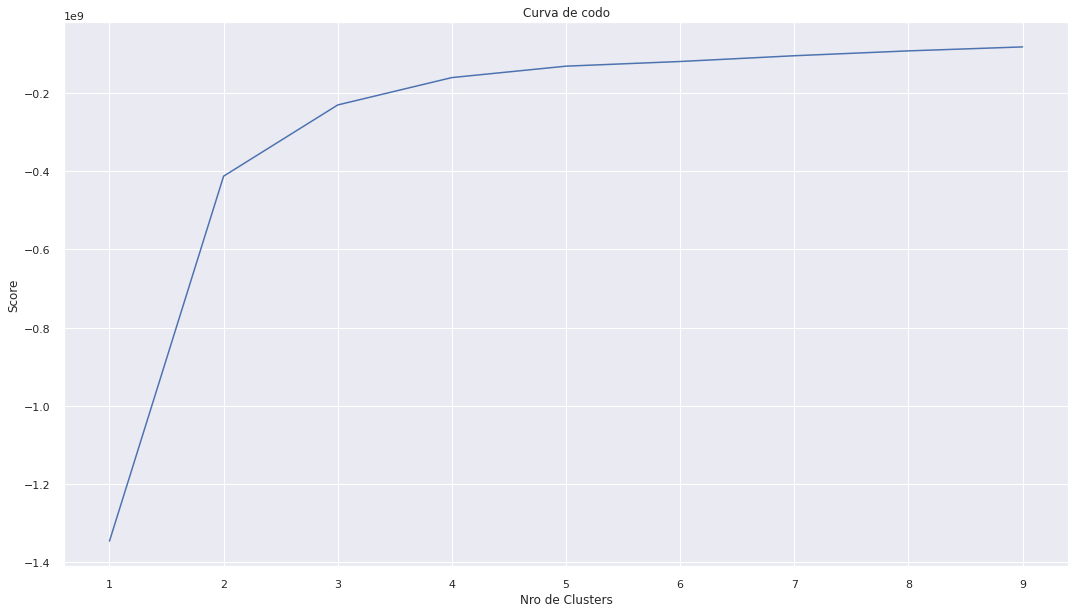

In [16]:
from sklearn.cluster import KMeans
print('Obtener el valor K')
Nc = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(X_train).score(X_test) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Nro de Clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

**Modelo KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
hiper1 = {'leaf_size': np.array([25,30,35]), 'p': np.array([1,2,3])}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=4), hiper1, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

{'leaf_size': 25, 'p': 3}

In [18]:
knn = KNeighborsClassifier(n_neighbors=4, leaf_size=25, p=3)
knn.fit(X_train, y_train)
print('Con KNN')
print('SCORE', knn.score(X_test, y_test))

Con KNN
SCORE 0.8903345724907064


**Modelo - Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
hiper1 = {'n_estimators': np.array([200, 250, 300]), 'min_samples_leaf': np.arange(3,8)}
grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs = -1), hiper1, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

{'min_samples_leaf': 5, 'n_estimators': 200}

In [20]:
rfc = RandomForestClassifier(random_state=42, n_jobs = -1, n_estimators= 200, min_samples_leaf=5)
rfc.fit(X_train, y_train)
print('Con random forestt')
print('SCORE', rfc.score(X_test, y_test))

Con random forestt
SCORE 0.9141883519206939


**Modelo - Supoort Vector Classifier**

In [21]:
from sklearn.svm import SVC
hiper1 = {'C': np.array([1,10,100]), 'gamma': np.array([0.1,0.01,0.001])}
grid = GridSearchCV(SVC(kernel='rbf'), hiper1, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [32]:
svm = SVC(kernel='rbf', C=1, gamma=0.001)
svm.fit(X_train, y_train)
print('Con SVC')
print('SCORE', svm.score(X_test, y_test))

Con SVC
SCORE 0.8909541511771994


**Modelo - Logistic regression**

In [28]:
from sklearn.linear_model import LogisticRegression
hiper1 = {'C': np.array([1,10,100]), 'tol': np.array([0.1,0.01,0.001])}
grid = GridSearchCV(LogisticRegression(random_state=42, n_jobs=-1), hiper1, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 10, 'tol': 0.1}

In [29]:
lrg = LogisticRegression(random_state=42, n_jobs=-1, C=10, tol=0.1)
lrg.fit(X_train, y_train)
print('Con Logistic Regression')
print('SCORE', lrg.score(X_test, y_test))

Con Logistic Regression
SCORE 0.9008674101610905


**Modelo de ensamble Voting Classifier**

In [33]:
evc = VotingClassifier(estimators=[('rfc', rfc), ('knn', knn), ('svc', svm), ('lr', lrg)], voting='hard')
evc.fit(X_train, y_train)
print('COn ensemble Voting')
print('SCORE', evc.score(X_test, y_test))

COn ensemble Voting
SCORE 0.895910780669145


In [34]:
from sklearn.metrics import accuracy_score
for clf in (lrg, rfc, svm, knn, evc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9008674101610905
RandomForestClassifier 0.9141883519206939
SVC 0.8909541511771994
KNeighborsClassifier 0.8903345724907064
VotingClassifier 0.895910780669145


Text(0.5, 1.0, 'Matriz de confusión')

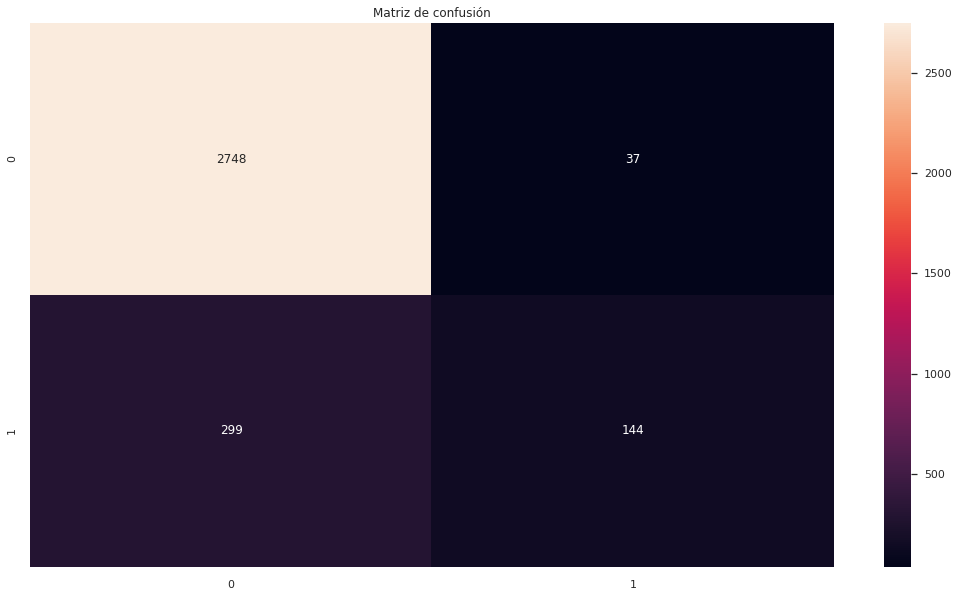

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = evc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de confusión')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2785
           1       0.80      0.33      0.46       443

    accuracy                           0.90      3228
   macro avg       0.85      0.66      0.70      3228
weighted avg       0.89      0.90      0.88      3228



**Comprobando resultado**

In [65]:
n_row = 5
y_pred1 = evc.predict([X_test.iloc[n_row].values])
if y_pred1[0] == y_test.iloc[n_row]:
  print('El modelo ha predecido el valor de', y_test.iloc[n_row])
else:
  print('El modelo no ha predecido', y_pred1[0] , '!=', y_test.iloc[n_row])

El modelo ha predecido el valor de 0
